In [1]:
import glob
import os
import pandas as pd

from catchment import models, views



def analyse_data(data_dir):
    """Calculate the standard deviation by day between datasets.

    Gets all the measurement data from the CSV files in the data directory,
    works out the mean for each day, and then graphs the standard deviation
    of these means.
    """
    data_file_paths = glob.glob(os.path.join(data_dir, 'rain_data_2015*.csv'))
    if len(data_file_paths) == 0:
        raise ValueError('No CSV files found in the data directory')
    data = map(models.read_variable_from_csv, data_file_paths)

    daily_std_list = []
    for dataset in data:
        daily_std = dataset.groupby(dataset.index.date).std()
        daily_std_list.append(daily_std)
    
    daily_standard_deviation = pd.concat(daily_std_list)
    return daily_standard_deviation

In [2]:
def compute_standard_deviation_by_day(data):
    daily_std_list = []
    for dataset in data:
        daily_std = dataset.groupby(dataset.index.date).std()
        daily_std_list.append(daily_std)
    
    return pd.concat(daily_std_list)



In [46]:
def compute_daily_std(dataset):
    return dataset.groupby(dataset.index.date).std()

def compute_standard_deviation_by_day(data):
    daily_std_list = map(compute_daily_std, data)
    return pd.concat(daily_std_list)


In [14]:
import math 

class Circle:
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return math.pi * self.radius * self.radius


In [15]:
mycircle = Circle(10)

In [21]:
print(mycircle.radius)
print(mycircle.area())

10
314.1592653589793


In [47]:
import glob
import os
import pandas as pd

from catchment import models, views


def daily_std(dataset):
    return dataset.groupby(dataset.index.date).std()

def map_compute_standard_deviation_by_day(data):
    #daily_std_list = map(daily_std, data)
    return pd.concat(map(daily_std, data))

def compute_standard_deviation_by_day(data):
    daily_std_list = []
    for dataset in data:
        daily_std = dataset.groupby(dataset.index.date).std()
        daily_std_list.append(daily_std)
    
    return pd.concat(daily_std_list)

def load_catchment_data(data_dir):
    data_file_paths = glob.glob(os.path.join(data_dir, 'rain_data_2015*.csv'))
    if len(data_file_paths) == 0:
        raise ValueError('No CSV files found in the data directory')
    return map(models.read_variable_from_csv, data_file_paths) 

def analyse_data(data_dir):
    """Calculate the standard deviation by day between datasets.

    Gets all the measurement data from the CSV files in the data directory,
    works out the mean for each day, and then graphs the standard deviation
    of these means.
    """
    return  map_compute_standard_deviation_by_day(load_catchment_data(data_dir))


In [63]:
class CSVDataSource:
    def __init__(self, data_dir):
        self.data_dir = data_dir

    def load_catchment_data(self):
        data_file_paths = glob.glob(os.path.join(self.data_dir, 'rain_data_2015*.csv'))
        if len(data_file_paths) == 0:
            raise ValueError('No CSV files found in the data directory')
        return list(map(models.read_variable_from_csv, data_file_paths)) # added list
    

In [74]:
data_dir = '/mnt/c/Users/Joseph/Documents/phd/landumi/shared_softdev/python-intermediate-rivercatchment/data'
#os.listdir(data_dir)

In [75]:

csv_data_source = CSVDataSource(data_dir)

In [76]:
csv_data_source.data_dir

'/mnt/c/Users/Joseph/Documents/phd/landumi/shared_softdev/python-intermediate-rivercatchment/data'

In [77]:
df = csv_data_source.load_catchment_data()

In [80]:
df[0]

,FP35,PL16
2005-12-01 00:00:00,0.0,0.0
2005-12-01 00:15:00,0.0,0.0
2005-12-01 00:30:00,0.0,0.0
2005-12-01 00:45:00,0.0,0.0
2005-12-01 01:00:00,0.0,0.0
...,...,...
2005-12-31 22:45:00,0.2,0.2
2005-12-31 23:00:00,0.0,0.0
2005-12-31 23:15:00,0.2,0.0
2005-12-31 23:30:00,0.2,0.0


In [72]:
#analyse_data(df)

In [68]:
adf = map_compute_standard_deviation_by_day(df)

In [1]:
adf.head()

NameError: name 'adf' is not defined

In [ ]:
import catchment_analysis as ca

In [ ]:
ca.__name__

'catchment_analysis'

In [ ]:
parser = ca.create_argparse()

In [ ]:
args = parser.parse_args(
    ['--full-data-analysis', 'data/rain_data_2015-12.csv']
)

Running csv


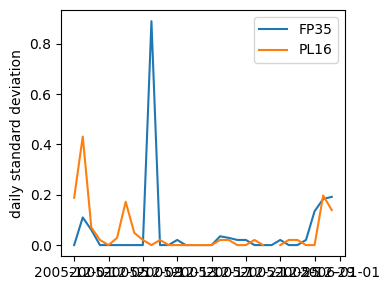

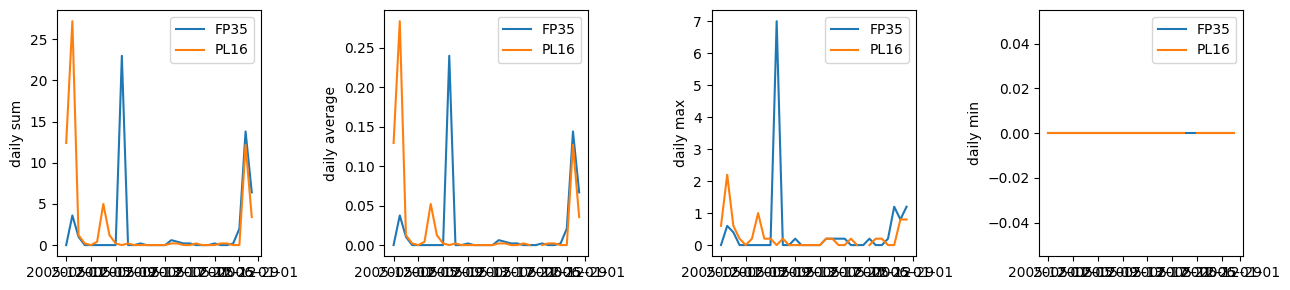

In [ ]:
ca.main(args)